# Linear Classification for Breast Cancer Diagnosis

This notebook performs linear classification on the preprocessed breast cancer dataset using Logistic Regression.


## Load Preprocessed Data


In [1]:
import os
from joblib import load
import pandas as pd
import numpy as np

# Load preprocessed data
joblib_path = os.path.join("..", "..", "data", "processed", "breast_cancer_preprocessed.joblib")
artifacts = load(joblib_path)

# Extract data
df_scaled = artifacts["df_scaled"]
feature_columns = artifacts["feature_columns"]
robust_scaler = artifacts["robust_scaler"]
df_winsorized = artifacts["df_winsorized"]

print("Loaded preprocessed data:")
print(f"  DataFrame shape: {df_scaled.shape}")
print(f"  Feature columns: {len(feature_columns)}")
print(f"  Class distribution:\n{df_scaled['class'].value_counts()}")
df_scaled.head()


Loaded preprocessed data:
  DataFrame shape: (285, 31)
  Feature columns: 30
  Class distribution:
class
0    177
1    108
Name: count, dtype: int64


,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,0,-0.002283,-0.282828,-0.049807,0.000000,-0.559686,-0.620730,-0.275909,-0.165054,-0.895775,...,0.028053,-0.189331,0.024205,0.039921,-0.131387,-0.465385,-0.144174,-0.030100,-0.484104,-0.177282
1,0,-0.278539,0.033670,-0.303342,-0.266684,-0.590576,-0.503445,-0.568742,-0.469968,-0.729577,...,-0.219472,0.172594,-0.267679,-0.200263,-0.083942,-0.442857,-0.636578,-0.494781,0.056358,0.066879
2,0,0.098174,-0.003367,0.084512,0.064891,0.210471,0.215804,-0.084622,0.086701,-0.281690,...,0.023102,0.023013,0.038206,0.028586,0.412409,0.224176,-0.089233,0.290362,0.011561,0.570064
3,1,-0.337900,-0.356902,-0.228470,-0.301767,0.730890,1.139422,1.085980,0.775754,1.956338,...,-0.202970,0.101464,-0.139772,-0.152456,0.266423,1.062637,0.858038,0.879193,2.015896,1.243631
4,1,1.084475,-0.311448,1.008997,1.170140,-0.296859,0.453306,0.491538,0.555492,-0.264789,...,0.892739,-0.354603,0.841955,0.998029,-0.178832,0.279121,0.779130,0.544745,0.001445,0.142251


## Prepare Features and Target


In [2]:
# Separate features and target
X = df_scaled[feature_columns].values
y = df_scaled['class'].values

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target distribution: {np.bincount(y)}")


Features shape: (285, 30)
Target shape: (285,)
Target distribution: [177 108]


## Train Linear Classifier (Logistic Regression)


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train logistic regression classifier on full dataset
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X, y)

print("Model trained successfully!")
print(f"Number of iterations: {logistic_model.n_iter_[0]}")


Model trained successfully!
Number of iterations: 16


## Evaluate on Training Set


In [4]:
# In-sample predictions (on full dataset)
y_pred = logistic_model.predict(X)
train_accuracy = accuracy_score(y, y_pred)

print("In-sample Performance (trained on full dataset):")
print(f"Accuracy: {train_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y, y_pred, target_names=['Benign (0)', 'Malignant (1)']))
print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))


In-sample Performance (trained on full dataset):
Accuracy: 0.9895

Classification Report:
               precision    recall  f1-score   support

   Benign (0)       0.99      0.99      0.99       177
Malignant (1)       0.99      0.98      0.99       108

     accuracy                           0.99       285
    macro avg       0.99      0.99      0.99       285
 weighted avg       0.99      0.99      0.99       285


Confusion Matrix:
[[176   1]
 [  2 106]]


## Feature Importance Analysis


Top 10 Most Important Features (by absolute coefficient):
               feature  coefficient  abs_coefficient
21        textureWorst     1.214213         1.214213
24     smoothnessWorst     1.133978         1.133978
13          areaStdErr     1.067130         1.067130
27  concavePointsWorst     1.008583         1.008583
15   compactnessStdErr    -0.879845         0.879845
26      concavityWorst     0.846097         0.846097
28       symmetryWorst     0.789185         0.789185
23           areaWorst     0.754640         0.754640
7    concavePointsMean     0.743742         0.743742
1          textureMean     0.718967         0.718967


/var/folders/0s/z77z8_yd7kq614n3kcfvrxch0000gn/T/ipykernel_96629/364437242.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='coefficient', y='feature', palette='viridis')


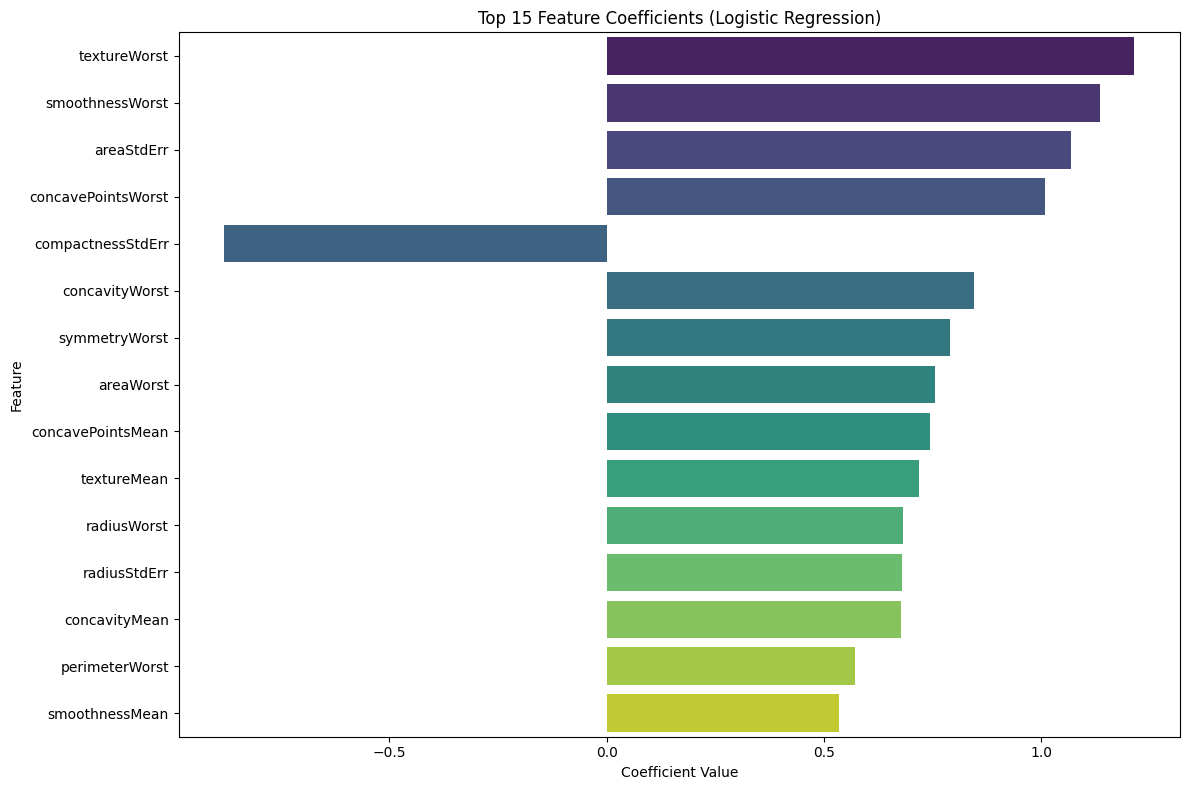

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature coefficients (weights)
coefficients = logistic_model.coef_[0]
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'coefficient': coefficients,
    'abs_coefficient': np.abs(coefficients)
}).sort_values('abs_coefficient', ascending=False)

print("Top 10 Most Important Features (by absolute coefficient):")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
sns.barplot(data=top_features, x='coefficient', y='feature', palette='viridis')
plt.title('Top 15 Feature Coefficients (Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


## Test on external CSV


In [ ]:
import os
import pandas as pd
import numpy as np

# Paths
test_csv_path = os.path.join("..", "..", "data", "breast-cancer-diagnostic.shuf.tes.csv")
sol_csv_path = os.path.join("..", "..", "data", "breast-cancer-diagnostic.shuf.sol.ex.csv")
output_dir = os.path.join("..", "..", "data", "processed")
os.makedirs(output_dir, exist_ok=True)
preds_out_path = os.path.join(output_dir, "breast_cancer_test_predictions.csv")

# Load test data
df_test_raw = pd.read_csv(test_csv_path)
print("Test raw shape:", df_test_raw.shape)

# Prepare test features: strip, keep ID for output, drop ID from features
id_col = "ID"
df_test = df_test_raw.copy()
df_test.columns = df_test.columns.str.strip()
ids = df_test[id_col].values if id_col in df_test.columns else np.arange(len(df_test))
if id_col in df_test.columns:
    df_test = df_test.drop(columns=[id_col])

# Align columns: add missing, drop extras, reorder to training feature order
missing_in_test = [c for c in feature_columns if c not in df_test.columns]
extra_in_test = [c for c in df_test.columns if c not in feature_columns]
if missing_in_test:
    print("Adding missing columns with zeros:", missing_in_test)
    for c in missing_in_test:
        df_test[c] = 0.0
if extra_in_test:
    print("Dropping extra columns not used by model:", extra_in_test)
    df_test = df_test.drop(columns=extra_in_test)

df_test = df_test[feature_columns]

# Apply same winsorization bounds as training: clip by training df_winsorized min/max per feature
lower_bounds = df_winsorized[feature_columns].min()
upper_bounds = df_winsorized[feature_columns].max()
df_test_capped = df_test.clip(lower=lower_bounds, upper=upper_bounds, axis=1)

# Scale using saved RobustScaler
X_test = robust_scaler.transform(df_test_capped.values)
print("Prepared test shape:", X_test.shape)

# Predict
y_test_pred = logistic_model.predict(X_test)
y_test_proba = logistic_model.predict_proba(X_test)[:, 1]

# Save predictions
preds = pd.DataFrame({
    "ID": ids,
    "prediction": y_test_pred,
    "proba_malignant": y_test_proba,
})
preds.to_csv(preds_out_path, index=False)
print("Saved predictions to:", preds_out_path)


## Evaluate against solution CSV (if available)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

try:
    df_sol = pd.read_csv(sol_csv_path)
    df_sol.columns = df_sol.columns.str.strip()
    # Expect a 'class' column in solution file
    if 'class' in df_sol.columns and len(df_sol) == len(preds):
        y_test_true = df_sol['class'].values
        print("Solution shape:", df_sol.shape)

        acc = accuracy_score(y_test_true, y_test_pred)
        print("Test Accuracy:", f"{acc:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test_true, y_test_pred, target_names=['Benign (0)', 'Malignant (1)']))
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test_true, y_test_pred))
    else:
        print("Solution file found but unexpected format or length mismatch. Skipping evaluation.")
except FileNotFoundError:
    print("Solution CSV not found. Skipping evaluation.")
